<a href="https://colab.research.google.com/github/Ziannnniiii/2025_AI_TI1B/blob/main/PenilaianAkhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Akhir

#1. Pengolahan Data

In [1]:
import pandas as pd

A. Baca file data_customer.csv menggunakan pandas

In [2]:
df = pd.read_csv('data_customer.csv')

B. Tampilkan 5 Data Pertama

In [3]:
print("5 data pertama:")
print(df.head())

5 data pertama:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   19            15             39
1           2   21            15             81
2           3   20            16              6
3           4   23            16             77
4           5   31            17             40


C. Tampilkan informasi awal dataset: jumlah data, nama kolom, dan tipe data

In [4]:
print("\nInformasi dataset:")
print("Jumlah data:", df.shape[0])
print("Nama kolom:", df.columns.tolist())
print("\nTipe data:")
print(df.dtypes)


Informasi dataset:
Jumlah data: 20
Nama kolom: ['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']

Tipe data:
CustomerID       int64
Age              int64
AnnualIncome     int64
SpendingScore    int64
dtype: object


#2. Pembersihan Data

A. Chek missing value

In [5]:
print("Cek missing value:")
print(df.isnull().sum())

Cek missing value:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


B. Menangani Data Missing (Jika Ada)

In [7]:
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean())

C. Deteksi dan tangani outlier pada kolom Age, AnnualIncome, dan SpendingScore jika ada

In [35]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['Age', 'AnnualIncome', 'SpendingScore']:
    df = remove_outliers_iqr(df, col)

print("Data setelah outlier dihapus:", df.shape)

Data setelah outlier dihapus: (17, 4)


#3. Pemrosesan Data

In [9]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

A. Lakukan normalisasi fitur numerik menggunakan Min-Max Scaling atau Standard Scaler

In [10]:
scaler = MinMaxScaler()
numerical = ['Age', 'AnnualIncome', 'SpendingScore']
df_scaled = df.copy()
df_scaled[numerical] = scaler.fit_transform(df[numerical])

B. Buat scatter plot sebelum dan sesudah normalisasi untuk membandingkan persebaran data

In [12]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

sebelum

Text(0.5, 1.0, 'Sebelum Normalisasi')

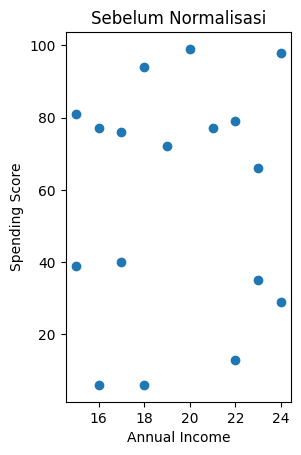

In [13]:
plt.subplot(1,2,1)
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Sebelum Normalisasi')

sesudah

Text(0.5, 1.0, 'Sesudah Normalisasi')

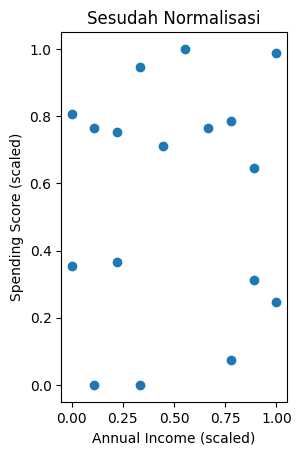

In [17]:
plt.subplot(1,2,2)
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'])
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Sesudah Normalisasi')

#4. Clustering dengan K-Means

In [18]:
from sklearn.cluster import KMeans

A. Tentukan jumlah klaster optimal menggunakan metode Elbow

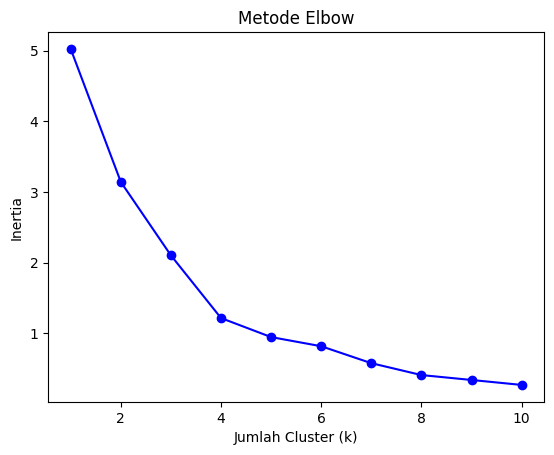

In [19]:
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[numerical])
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.show()

B. Terapkan algoritma K-Means Clustering untuk membagi pelanggan ke dalam beberapa segmen

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[numerical])

C. Tampilkan hasil klaster pada plot 2D menggunakan fitur AnnualIncome dan SpendingScore

Text(0.5, 1.0, 'Hasil Clustering K-Means')

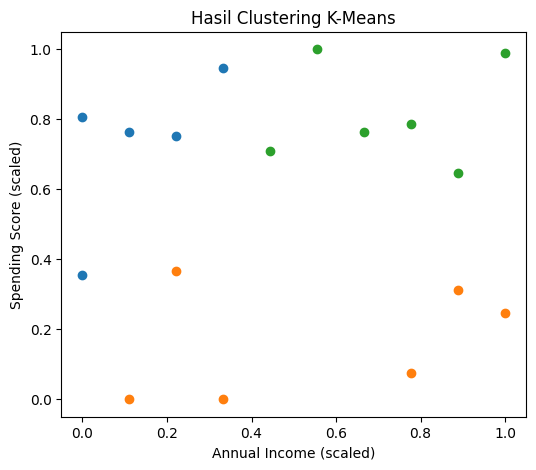

In [24]:
plt.figure(figsize=(6,5))
for cluster in df_scaled['Cluster'].unique():
    cluster_data = df_scaled[df_scaled['Cluster'] == cluster]
    plt.scatter(cluster_data['AnnualIncome'], cluster_data['SpendingScore'], label=f'Cluster {cluster}')

plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Hasil Clustering K-Means')